In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/lego-stemhub/lego/lego_test/lego_test/2x4/2_Brick_2x4_180713184552.jpg
/kaggle/input/lego-stemhub/lego/lego_test/lego_test/2x4/2_Brick_2x4_180713185130.jpg
/kaggle/input/lego-stemhub/lego/lego_test/lego_test/2x4/image_2.jpg
/kaggle/input/lego-stemhub/lego/lego_test/lego_test/2x4/2_Brick_2x4_180713185344.jpg
/kaggle/input/lego-stemhub/lego/lego_test/lego_test/2x4/1_Brick_2x4_180713180631.jpg
/kaggle/input/lego-stemhub/lego/lego_test/lego_test/2x4/2_Brick_2x4_180713185635.jpg
/kaggle/input/lego-stemhub/lego/lego_test/lego_test/2x4/1_Brick_2x4_180713181122.jpg
/kaggle/input/lego-stemhub/lego/lego_test/lego_test/2x4/2_Brick_2x4_180713185221.jpg
/kaggle/input/lego-stemhub/lego/lego_test/lego_test/2x4/2_Brick_2x4_180713185326.jpg
/kaggle/input/lego-stemhub/lego/lego_test/lego_test/2x4/1_Brick_2x4_180713180503.jpg
/kaggle/input/lego-stemhub/lego/lego_test/lego_test/2x4/1_Brick_2x4_180711233933.jpg
/kaggle/input/lego-stemhub/lego/lego_test/lego_test/2x4/1_Brick_2x4_180713182251.j

In [2]:
# =============================================================================
# Import Libraries
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

# =============================================================================
# Read Data
# =============================================================================
trainpath = '/kaggle/input/lego-stemhub/lego/lego_train/'
testpath = '/kaggle/input/lego-stemhub/lego/lego_test/'

# =============================================================================
# number of images on lego_train file
# =============================================================================

for folder in  os.listdir(trainpath + 'lego_train') : 
    files = gb.glob(pathname= str( trainpath +'lego_train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 719 in folder 2x4
For training data , found 680 in folder 2x2
For training data , found 440 in folder 2x1


Using TensorFlow backend.


In [3]:
# =============================================================================
#     # number of images on lego_test file
# =============================================================================
    
for folder in  os.listdir(testpath +'lego_test') : 
    files = gb.glob(pathname= str( testpath +'lego_test//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 109 in folder 2x4
For testing data , found 169 in folder 2x2
For testing data , found 156 in folder 2x1


In [4]:
# =============================================================================
# Check images for lego_train
# =============================================================================
size = []
for folder in  os.listdir(trainpath +'lego_train') : 
    files = gb.glob(pathname= str( trainpath +'lego_train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(480, 640, 3)    1399
(153, 111, 3)       3
(170, 163, 3)       3
(180, 183, 3)       2
(198, 198, 3)       2
                 ... 
(162, 127, 3)       1
(163, 301, 3)       1
(198, 119, 3)       1
(175, 158, 3)       1
(319, 273, 3)       1
Length: 413, dtype: int64

In [5]:
# =============================================================================
# Check images for lego_test
# =============================================================================

size = []
for folder in  os.listdir(testpath +'lego_test') : 
    files = gb.glob(pathname= str( testpath +'lego_test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(480, 640, 3)    202
(189, 178, 3)      2
(206, 205, 3)      2
(153, 157, 3)      2
(193, 191, 3)      2
                ... 
(219, 154, 3)      1
(171, 184, 3)      1
(185, 179, 3)      1
(209, 325, 3)      1
(156, 126, 3)      1
Length: 227, dtype: int64

In [6]:
# =============================================================================
# Creat X and y
# =============================================================================
code = {'2x1':0 ,'2x2':1,'2x4':2}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x
s=100
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'lego_train') : 
    files = gb.glob(pathname= str( trainpath +'lego_train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])
        
print(f'we have {len(X_train)} items in X_train')

we have 1839 items in X_train


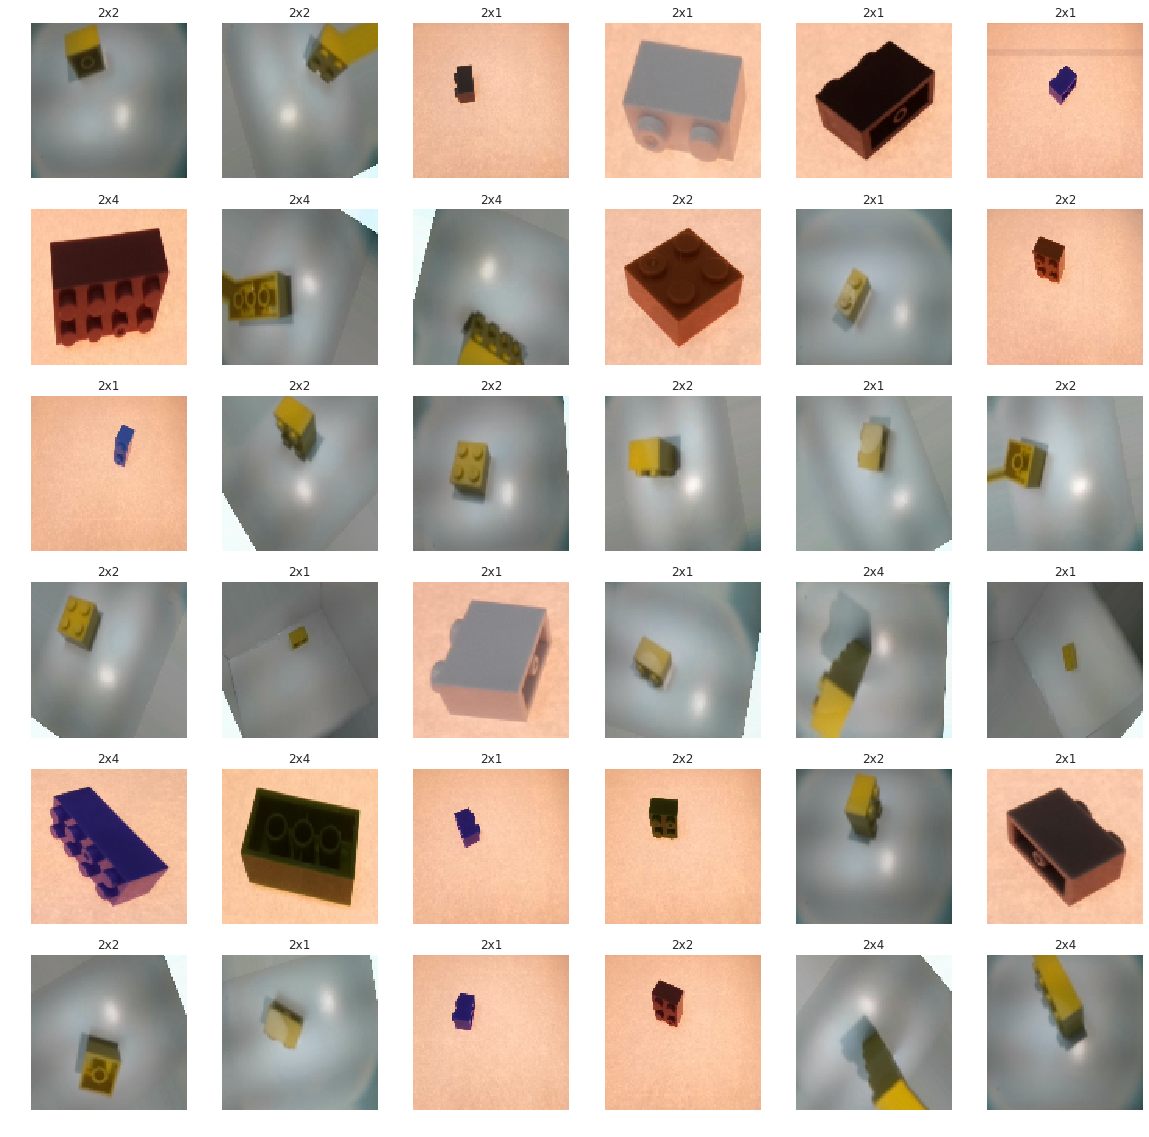

In [7]:
# =============================================================================
# plot X and y (train)
# =============================================================================
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [8]:
# =============================================================================
# X and y test
# =============================================================================

s=100
X_test = []
y_test = []
for folder in  os.listdir(testpath +'lego_test') : 
    files = gb.glob(pathname= str( testpath +'lego_test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])
        
print(f'we have {len(X_test)} items in X_test')  

we have 434 items in X_test


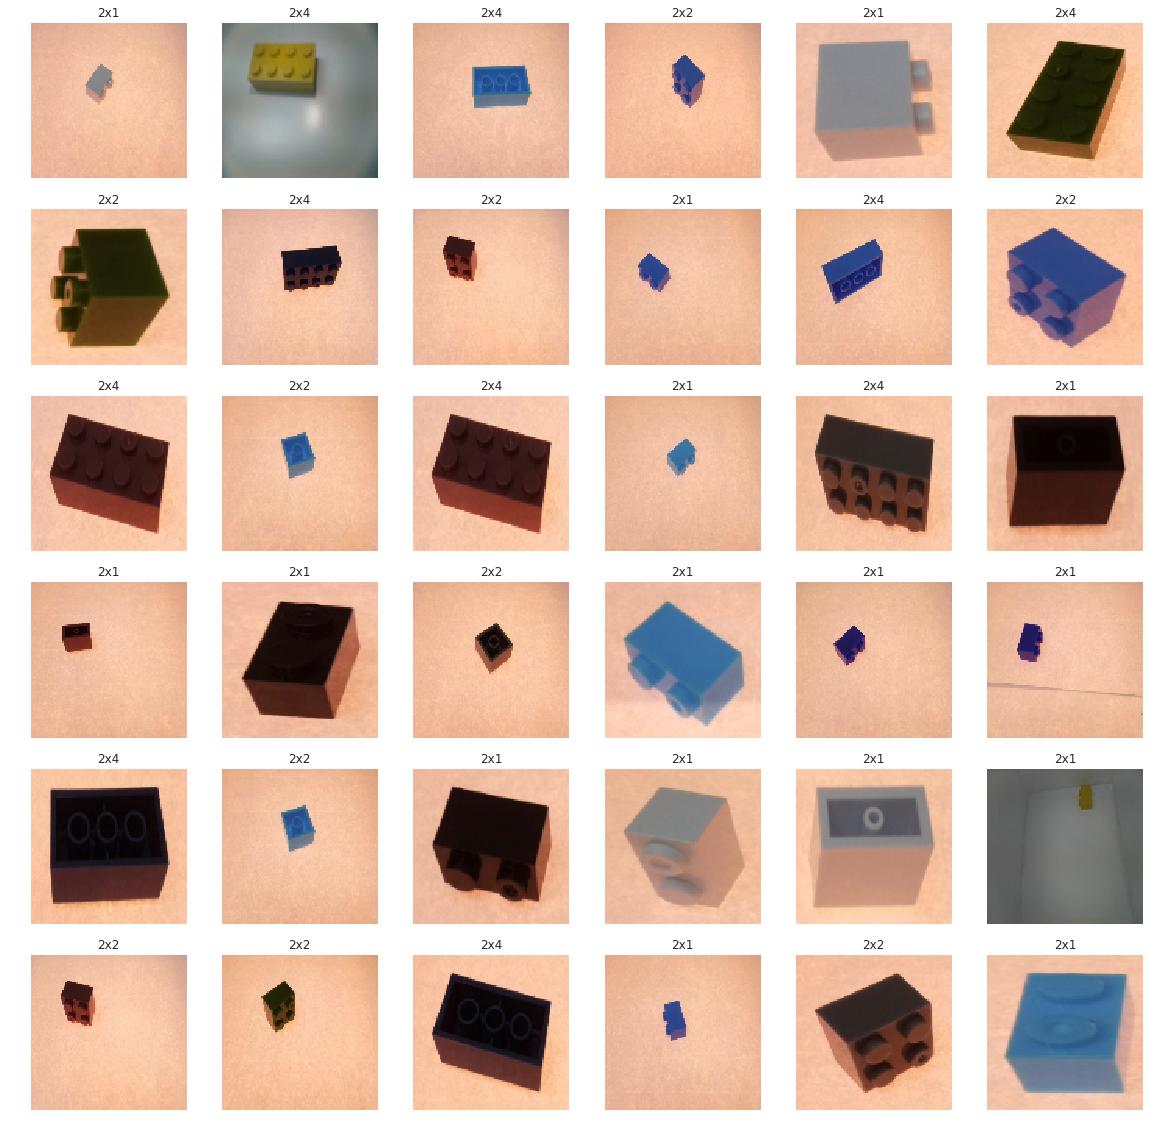

In [9]:
# =============================================================================
# plot X and y (test)
# =============================================================================

plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])   
    plt.axis('off')
    plt.title(getcode(y_test[i]))
    

In [10]:
# =============================================================================
# Convert to array
# =============================================================================
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (1839, 100, 100, 3)
X_test shape  is (434, 100, 100, 3)
y_train shape  is (1839,)
y_test shape  is (434,)


In [11]:
# =============================================================================
# Save Data
# =============================================================================
import pickle

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

In [12]:
# =============================================================================
# Import Libraries
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
# =============================================================================
# load Data
# =============================================================================
import pickle

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

In [13]:
# =============================================================================
# Build your model
# =============================================================================
s=100
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(3,activation='softmax') ,    
        ])
    
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 200)       5600      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 150)       270150    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 150)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 120)       162120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 80)        86480     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 50)        36050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (Non

In [14]:
# =============================================================================
# Train and save
# =============================================================================
epochs = 50
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)

Epoch 1/50
1839/1839 [==============================] - 9s 5ms/step - loss: 1.9319 - accuracy: 0.3535
Epoch 2/50
1839/1839 [==============================] - 3s 2ms/step - loss: 1.0680 - accuracy: 0.3921
Epoch 3/50
1839/1839 [==============================] - 3s 2ms/step - loss: 1.0640 - accuracy: 0.3953
Epoch 4/50
1839/1839 [==============================] - 3s 2ms/step - loss: 1.0122 - accuracy: 0.4579
Epoch 5/50
1839/1839 [==============================] - 3s 2ms/step - loss: 0.9642 - accuracy: 0.4883
Epoch 6/50
1839/1839 [==============================] - 3s 2ms/step - loss: 0.8677 - accuracy: 0.5710
Epoch 7/50
1839/1839 [==============================] - 3s 2ms/step - loss: 0.8384 - accuracy: 0.6096
Epoch 8/50
1839/1839 [==============================] - 3s 2ms/step - loss: 0.7204 - accuracy: 0.6786
Epoch 9/50
1839/1839 [==============================] - 3s 2ms/step - loss: 0.6171 - accuracy: 0.7183
Epoch 10/50
1839/1839 [==============================] - 3s 2ms/step - loss: 0.572

In [15]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))


1839/1839 [==============================] - 2s 855us/step
Test Loss is 0.0482955852061583
Test Accuracy is 0.9836868047714233


In [16]:
KerasModel.save("/kaggle/working/model2.h5")
print("Weights Saved")

Weights Saved
